# Tensor Flow - Deep Learning

https://www.tensorflow.org/

https://playground.tensorflow.org/

### Theory

#### What is a Tensor?

In mathematics, a tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space

Basically an equation that describes the relationship between different objects in the same space

The bonus is that the ideas and concepts are really similar to Numpy and we can even manipulate data between the 2 libraries

If you know Numpy, TensorFlow is understandable

#### What is TensorFlow?

Developed by Google, TensorFlow (TF) is an open source framework to run machine learning, deep learning and other predictive analytics workloads

#### Why is TensorFlow so popular?

They have a dedicated processor that allows calculations to be run really fast...GPU or Graphical Processing Unit

Tensors are really good at organizing really large data sets in a way that makes them easy process at scale





## What is Keras?

A deep learning library that was developed to make TensorFlow easier to work with

#### Do I need to know both?

If this was pre-2017, then yes, you need to know both, but now you only need to know one

Nope, TensorFlow has intergrated Keras into it's own library so plug and play just became a whole lot easier


### What is TensorFlow / Keras trying to solve?

SciKit Learn is great, it's a really good tool that gives us variety in ways to approach predictions with our data

But it's a has huge downside...The requirement of having to tune each model separately

What if there was a way to have the Algorithm tune itself to find the best fit for the data that we have?

TensorFlow tries to solve this problem through filtering data through a Neural Network

Before we get into the Neural Network, let's first understand the basic component of the Neural Network

## TensorFlow Architecture

### Neuron

A neruon is a single function to calculate inputs and give an output

The Neuron takes in an X value

If there are multiple Neurons each neuron is assigned a W value or weight which is multiplied by the X Input value (X * W)

Now in the event that X is 0, our output would also be 0, which doesn't make for a very good neural network so a Bias, B is added to prevent a 0 outcome (X * W + B)

Taken all together based on the number of inputs we have

X1 * W1 + B

X2 * W2 + B1

...

Xn * Wn + B = Y

<div>
<img src="https://github.com/linusidom/data_sciences/blob/main/neuron.png?raw=true" width="500"/>
</div>


### Neural Network

Put many Neurons together and connect them up to each other and we get what is known as a neural network

Each Neural Network Vertical Line is knows as a Layer

<div>
<img src="https://github.com/linusidom/data_sciences/blob/main/neural_network.png?raw=true" width="500"/>
</div>

### Activation Functions

Each Neural Network Layer has what is called an Activation function

Basically a standard way to process the data coming in

Most common for beginners is the <i><b>Rectified linear unit (ReLU)</b></i>

This is the one we will be using most often


For more information on this:

https://en.wikipedia.org/wiki/Activation_function

### Propagation

The process of sending data from one layer to the next is called propagation. There are two types of propagation: forward propagation and backward propagation.

###### Forward Propagation

The data moves from input to hidden layer to output

It ends in a prediction based on the input

###### Backward Propagation

The Prediction travels backwards towards the input while tracking the error rate

The error rate is used to modify the weights and biases of each neuron, giving the neurons with a higher error rate a greater adjustment

Through re-adjustment within the hidden layers, the neural network can predict with greater accuracy the line of best fit for the data



### How Many Layers/Nodes should I have?

"Very simple. Just keep adding layers until the test error does not improve anymore." - Yoshua Bengio

#### Layers

Number of Input Layers * 2 or 3 + the number of Output Layers = Number of Layers

Simple examples

1 input and 1 output

1 input * 2 + 1 output = 3 Neural Network Layers

2 input * 2 + 1 output = 5 Neural Network Layers

#### Nodes

Tunable paramter

Start with 1 node per feature in the dataset

If the dataset is too small or has too few features, start with a default of 4 nodes x 3 layers

## Our First Tensor Flow Model

#### Getting Started

Import the libraries

```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```

Regression

`from sklearn.datasets import fetch_california_housing`

Classification

`from sklearn.datasets import load_iris`


### Clean, Manipulate and Prepare the data

#### Train Test Split

For TensorFlow, values are more important than dataframes

```
X = df[df.columns[1:]].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
```

#### Scaling the data


It is important to scale the data to the X_train data set, not both

Fit to the X_train data only

Apply the X_train fit scaler to both datasets

This ensures that both datasets are normalized in the same way

```
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
` ``

Check, the min for X_train should be 0.0 and the min for X_test should not be 0.0

```
X_train.min() -> 0.0
X_test.min() -> -0.014 (my dataset)
```



### Training the model

There are a few Key concepts here

Instantiation

Layers - How many Neural Networks do we want

Compilation - What algorithm type to use to train our model

### Instantiation

`model = Sequential()`


### Layers

How to setup each Hidden Neural Network

The number of nodes in each layer can be the number of features in our data set

Number of Input Layers * 2 or 3 + the number of Output Layers = Number of Layers

#### Hidden Layers

```
model.add(Dense(10,activation='relu') # (required)
model.add(Dense(10,activation='relu') # (optional)
model.add(Dense(10,activation='relu') # (optional)
```


#### Output Layer

`model.add(Dense(1)) # Output layer (required)`


### Compile

`optimizer` -> similar to the algorithm in SKLearn, how do we want to evaluate the data
- For regression the best choices are either `adam` or `rmsprop`
- Both are adaptive Optimzers
- For more optimizers - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/

`loss` -> What metric are we trying to decrease in our back propagation

`model.compile(optimizer='adam',  loss='mse')`

OR

With Customizable Optimizer and Loss Function

```
model.compile(
  optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), 
  loss=tf.keras.losses.MeanSquaredError()
```


### Fit

Fit the model with the training data

`epochs` (optional) -> number of times the model will run and try to improve upon itself

`validation_data` (optional) ->  Compare against the actual data to check against overfit/underfit, not used in calcualtion however added to `model.history.history` output

`batch_size` (optional) -> Chunk down the data to test against (will go slower but hopefully provides a higer overall accuracy)


```
model.fit(
  X_train,
  y_train,
  epochs=250,
  verbose=2,
  validation_data=(X_test, y_test),
  batch_size=256)
```






### Pre-Prediciton Metrics

### Loss vs Validation

Get the history of the model so that we can visualize what it did

```
model.history.history
history_df = pd.DataFrame(model.history.history)
history_df.plot()
```

OR

`pd.DataFrame(model.history.history).plot()`

<div>
<img src="https://github.com/linusidom/data_sciences/blob/main/tf_loss_curve_1.png?raw=true" width="500"/>
</div>


If we have added validation to the `model.fit`, then we can see the data against our testing set

<div>
<img src="https://github.com/linusidom/data_sciences/blob/main/tf_loss_curve_2.png?raw=true" width="500"/>
</div>


### Predictions

`test_predictions = model.predict(X_test)`

## Evaluations

We can evaluate the training data and the test data

```
model.evaluate(X_test, y_test, verbose=1)
model.evaluate(X_train, y_train, verbose=1)
```

#### Scatterplot

`plt.scatter(x=test_predictions, y=y_test)`

#### MAE and RMSE

```
mean_absolute_error(y_test, test_predictions)
np.sqrt(mean_squared_error(y_test, test_predictions))
```

#### Score

`explained_variance_score(y_test, predictions)`

### Tuning ideas

  Here are some options that we can take action on right away

  - Increase/Decrease layers
  - Increase/Decrease the number of units per layer
  - Change the activation functions
  - Change the learning rate
  - Change the optimization function
  - Fit on more data
  - Transfer Learning...
   - Built In Models within TensorFlow
   - TensorFlow Hub

#### Callbacks

- EarlyStopping
 - Track a property and stop when that property stops improving
- LearningRateScheduler
 - Change the learning rate dynamically to find the best learning rate
- ReduceLROnPlateau
 - Reduce learning rate when a metric has stopped improving.

In [80]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### What is a Tensor

No different than Numpy but with an arrangement of data that can run on a special Processor called a GPU...Graphical Processing Unit

In [81]:
tensor_1 = tf.constant(10)

In [82]:
tensor_1

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [83]:
tensor_2 = tf.constant([10,11])

In [84]:
tensor_2

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 11], dtype=int32)>

In [85]:
tensor_3 = tf.constant([
    [10,11],
    [12,13]
])

In [86]:
tensor_3

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 11],
       [12, 13]], dtype=int32)>

In [87]:
tensor_4 = tf.random.uniform([5,6])

In [88]:
tensor_4

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[0.96590316, 0.03349841, 0.9000765 , 0.09889817, 0.5032494 ,
        0.31573117],
       [0.7322906 , 0.7691349 , 0.68907595, 0.17229748, 0.30730247,
        0.38062942],
       [0.84825385, 0.96359396, 0.3176906 , 0.3373686 , 0.09644198,
        0.855096  ],
       [0.6229923 , 0.11116111, 0.6778214 , 0.9896915 , 0.6364535 ,
        0.6346048 ],
       [0.48070657, 0.67966056, 0.22904813, 0.5128678 , 0.82484806,
        0.9024707 ]], dtype=float32)>

In [92]:
tensor_5 = tf.reshape(tensor_4, [3,5,2])

In [96]:
tensor_5

<tf.Tensor: shape=(3, 5, 2), dtype=float32, numpy=
array([[[0.96590316, 0.03349841],
        [0.9000765 , 0.09889817],
        [0.5032494 , 0.31573117],
        [0.7322906 , 0.7691349 ],
        [0.68907595, 0.17229748]],

       [[0.30730247, 0.38062942],
        [0.84825385, 0.96359396],
        [0.3176906 , 0.3373686 ],
        [0.09644198, 0.855096  ],
        [0.6229923 , 0.11116111]],

       [[0.6778214 , 0.9896915 ],
        [0.6364535 , 0.6346048 ],
        [0.48070657, 0.67966056],
        [0.22904813, 0.5128678 ],
        [0.82484806, 0.9024707 ]]], dtype=float32)>

In [101]:
tensor_5[-2:,1:3,0]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.84825385, 0.3176906 ],
       [0.6364535 , 0.48070657]], dtype=float32)>

In [104]:
tf.expand_dims(tensor_5, axis=0)

<tf.Tensor: shape=(1, 3, 5, 2), dtype=float32, numpy=
array([[[[0.96590316, 0.03349841],
         [0.9000765 , 0.09889817],
         [0.5032494 , 0.31573117],
         [0.7322906 , 0.7691349 ],
         [0.68907595, 0.17229748]],

        [[0.30730247, 0.38062942],
         [0.84825385, 0.96359396],
         [0.3176906 , 0.3373686 ],
         [0.09644198, 0.855096  ],
         [0.6229923 , 0.11116111]],

        [[0.6778214 , 0.9896915 ],
         [0.6364535 , 0.6346048 ],
         [0.48070657, 0.67966056],
         [0.22904813, 0.5128678 ],
         [0.82484806, 0.9024707 ]]]], dtype=float32)>

In [112]:
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

### Read in the Data into a DataFrame

In [106]:
data = fetch_california_housing()

In [108]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [109]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [110]:
df['target'] = data.target

In [111]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Train Test Split and Scale the Data

In [113]:
X = df[df.columns[:-1]].values
y = df['target'].values

# AutoComplete ctrl + space
# Help String/Doc String - Shift + CMD + Space

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [114]:
# Scale the Data

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
X_test

array([[0.2228521 , 0.23529412, 0.02700089, ..., 0.00226565, 0.17747078,
        0.57669323],
       [0.25111378, 0.56862745, 0.02900371, ..., 0.00379687, 0.16684378,
        0.64442231],
       [0.23563813, 0.78431373, 0.03112109, ..., 0.00485294, 0.54941552,
        0.18924303],
       ...,
       [0.32802306, 0.31372549, 0.06688601, ..., 0.00248122, 0.18065887,
        0.71912351],
       [0.29434077, 0.47058824, 0.02401247, ..., 0.00779904, 0.12752391,
        0.64243028],
       [0.22065903, 0.7254902 , 0.03119847, ..., 0.00311773, 0.16578108,
        0.62649402]])

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Build our first Model - model_1

Single Layer

Number of units equals the number of features

Use 'tanh' for activation

Use the Adam Optimizer

Train for 25 Epochs

In [137]:
# Initialize our first Model

model_1 = Sequential()

# Our first Layer
model_1.add(Dense(8, activation='tanh'))

# Output Layer
model_1.add(Dense(1, activation='tanh'))


# Compile
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanAbsoluteError()
)


# Fit
history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25)


Epoch 1/25
452/452 [==============================] - 2s 3ms/step - loss: 1.2717 - val_loss: 1.1848
Epoch 2/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1530 - val_loss: 1.1738
Epoch 3/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1477 - val_loss: 1.1713
Epoch 4/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1462 - val_loss: 1.1704
Epoch 5/25
452/452 [==============================] - 2s 3ms/step - loss: 1.1455 - val_loss: 1.1699
Epoch 6/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1452 - val_loss: 1.1696
Epoch 7/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1449 - val_loss: 1.1694
Epoch 8/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1448 - val_loss: 1.1693
Epoch 9/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1447 - val_loss: 1.1692
Epoch 10/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1447 - val_loss: 1.1692

In [133]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 72        
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [134]:
print(8 * (8 + 1))

72


In [135]:
print(1 * (8 + 1))

9


### What does Our Model Look like?

Model Summary

### Evaluate the Model with Plots

It's probably a good idea to create a function to plot all the things we want on separate graphs otherwise the data is going to be hard to read

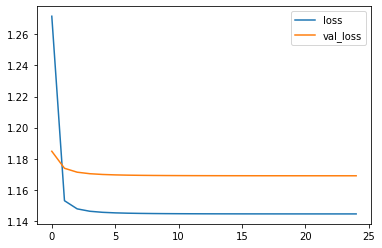

In [138]:
pd.DataFrame(history_1.history).plot()

In [139]:
df['target'].mean()

2.068558169089147

In [140]:
model_1.evaluate(X_test, y_test)

194/194 [==============================] - 0s 2ms/step - loss: 1.1690


1.169024109840393

In [141]:
prediction_1 = model_1.predict(X_test)

In [142]:
mean_absolute_error(y_test, prediction_1)

1.1690239557988054

### 2nd Model - Add a Hidden Layer

Copy of Model 1

Add another Hidden Layer

All other parameters remain the same


In [145]:
model_2 = Sequential()

model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(8, activation='tanh'))

model_2.add(Dense(1, activation='tanh'))

model_2.compile(
    optimizer='adam',
    loss='mae'
)

history_2 = model_2.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        epochs=25)

Epoch 1/25
452/452 [==============================] - 2s 3ms/step - loss: 1.2822 - val_loss: 1.1740
Epoch 2/25
452/452 [==============================] - 2s 5ms/step - loss: 1.1472 - val_loss: 1.1706
Epoch 3/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1456 - val_loss: 1.1698
Epoch 4/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1451 - val_loss: 1.1695
Epoch 5/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1448 - val_loss: 1.1693
Epoch 6/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1447 - val_loss: 1.1692
Epoch 7/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1447 - val_loss: 1.1692
Epoch 8/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1446 - val_loss: 1.1691
Epoch 9/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1446 - val_loss: 1.1691
Epoch 10/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1691

In [144]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


### 3rd Model - Add Units to the layer

Copy of Model 1

Add units to the  Layer (128)

All other parameters remain the same

In [146]:
model_3 = Sequential()

model_3.add(Dense(128, activation='tanh'))

model_3.add(Dense(1, activation='tanh'))

model_3.compile(
    optimizer='adam',
    loss='mae'
)

history_3 = model_3.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1837 - val_loss: 1.1702
Epoch 2/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1451 - val_loss: 1.1693
Epoch 3/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1447 - val_loss: 1.1692
Epoch 4/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1446 - val_loss: 1.1691
Epoch 5/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1691
Epoch 6/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1445 - val_loss: 1.1691
Epoch 7/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 8/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 9/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 10/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1445 - val_loss: 1.1690

In [147]:
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1152      
                                                                 
 dense_34 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [148]:
print(128 * ( 8 + 1))

1152


### 4th Model - Change the Activation algorithm

Copy of Model 1

Change the activation to 'relu'

All other parameters remain the same

In [149]:
model_4 = Sequential()

model_4.add(Dense(8, activation='relu'))

model_4.add(Dense(1, activation='relu'))

model_4.compile(
    optimizer='adam',
    loss='mae'
)

history_4 = model_4.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)


Epoch 1/25
452/452 [==============================] - 2s 4ms/step - loss: 1.0802 - val_loss: 0.8234
Epoch 2/25
452/452 [==============================] - 2s 4ms/step - loss: 0.7050 - val_loss: 0.6263
Epoch 3/25
452/452 [==============================] - 1s 3ms/step - loss: 0.5726 - val_loss: 0.5650
Epoch 4/25
452/452 [==============================] - 1s 3ms/step - loss: 0.5481 - val_loss: 0.5590
Epoch 5/25
452/452 [==============================] - 2s 4ms/step - loss: 0.5425 - val_loss: 0.5521
Epoch 6/25
452/452 [==============================] - 2s 4ms/step - loss: 0.5379 - val_loss: 0.5481
Epoch 7/25
452/452 [==============================] - 1s 3ms/step - loss: 0.5346 - val_loss: 0.5450
Epoch 8/25
452/452 [==============================] - 1s 3ms/step - loss: 0.5312 - val_loss: 0.5425
Epoch 9/25
452/452 [==============================] - 1s 3ms/step - loss: 0.5287 - val_loss: 0.5387
Epoch 10/25
452/452 [==============================] - 1s 3ms/step - loss: 0.5254 - val_loss: 0.5361

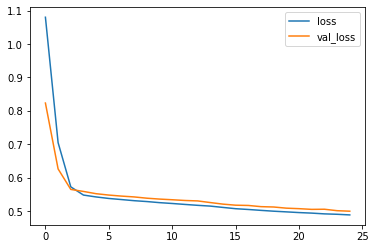

In [150]:
pd.DataFrame(history_4.history).plot()

### 5th Model - Change the Learning Rate

Copy of Model 1

Reduce the learning rate to 0.01

All other parameters remain the same

In [152]:
model_5 = tf.keras.models.clone_model(model_1)

model_5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mae'
)

history_5 = model_5.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
452/452 [==============================] - 2s 3ms/step - loss: 1.1539 - val_loss: 1.1693
Epoch 2/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1446 - val_loss: 1.1691
Epoch 3/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1691
Epoch 4/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 5/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 6/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 7/25
452/452 [==============================] - 2s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 8/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 9/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 10/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1445 - val_loss: 1.1690

### 6th Model - Change the Optimizer

Copy of Model 1

Change the Optimizer to 'rmsprop'

All other parameters remain the same

In [153]:
model_6 = tf.keras.models.clone_model(model_1)

model_6.compile(
    optimizer='rmsprop',
    loss='mae'
)

history_6 = model_6.fit(
    X_train, 
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
452/452 [==============================] - 2s 3ms/step - loss: 1.2464 - val_loss: 1.1692
Epoch 2/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 3/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 4/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 5/25
452/452 [==============================] - 2s 4ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 6/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 7/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 8/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 9/25
452/452 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 1.1690
Epoch 10/25
452/452 [==============================] - 2s 3ms/step - loss: 1.1445 - val_loss: 1.1690

### 7th Model - Combining it all

Copy of Model 1

Increase the number of units to 128

Change the activation algorithm to **'relu'**

Add 2 more Dense Layers

Reduce the learning rate to 0.01

In [154]:
model_7 = Sequential()

model_7.add(Dense(128, activation='relu'))
model_7.add(Dense(128, activation='relu'))
model_7.add(Dense(128, activation='relu'))

model_7.add(Dense(1, activation='relu'))

model_7.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mae'
)

history_7 = model_7.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25
)

Epoch 1/25
452/452 [==============================] - 3s 5ms/step - loss: 0.5668 - val_loss: 0.5183
Epoch 2/25
452/452 [==============================] - 2s 5ms/step - loss: 0.5058 - val_loss: 0.4859
Epoch 3/25
452/452 [==============================] - 2s 5ms/step - loss: 0.4777 - val_loss: 0.4675
Epoch 4/25
452/452 [==============================] - 2s 5ms/step - loss: 0.4614 - val_loss: 0.4505
Epoch 5/25
452/452 [==============================] - 2s 5ms/step - loss: 0.4506 - val_loss: 0.4773
Epoch 6/25
452/452 [==============================] - 2s 4ms/step - loss: 0.4449 - val_loss: 0.4402
Epoch 7/25
452/452 [==============================] - 2s 5ms/step - loss: 0.4403 - val_loss: 0.4586
Epoch 8/25
452/452 [==============================] - 2s 4ms/step - loss: 0.4369 - val_loss: 0.4216
Epoch 9/25
452/452 [==============================] - 2s 4ms/step - loss: 0.4310 - val_loss: 0.4220
Epoch 10/25
452/452 [==============================] - 2s 5ms/step - loss: 0.4227 - val_loss: 0.4389

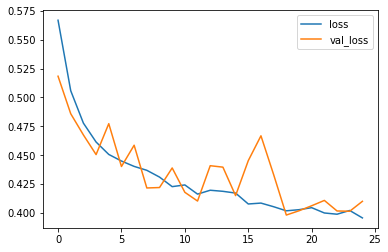

In [155]:
pd.DataFrame(history_7.history).plot()

### 8th Model - Callbacks (Early Stopping)

Copy Model 7

Add an Early Stopping Callback

All other parameters remain the same

In [156]:
from tensorflow.keras.callbacks import EarlyStopping

In [157]:
model_8 = tf.keras.models.clone_model(model_7)

model_8.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mae'
)


# EarlyStopping Callback

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

history_8 = model_8.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=250,
    callbacks=[es]
)

Epoch 1/250
452/452 [==============================] - 2s 3ms/step - loss: 0.5661 - val_loss: 0.5105
Epoch 2/250
452/452 [==============================] - 1s 2ms/step - loss: 0.4982 - val_loss: 0.4747
Epoch 3/250
452/452 [==============================] - 1s 2ms/step - loss: 0.4742 - val_loss: 0.4704
Epoch 4/250
452/452 [==============================] - 1s 3ms/step - loss: 0.4722 - val_loss: 0.5060
Epoch 5/250
452/452 [==============================] - 1s 2ms/step - loss: 0.4551 - val_loss: 0.4488
Epoch 6/250
452/452 [==============================] - 1s 3ms/step - loss: 0.4430 - val_loss: 0.4359
Epoch 7/250
452/452 [==============================] - 1s 2ms/step - loss: 0.4402 - val_loss: 0.4308
Epoch 8/250
452/452 [==============================] - 1s 3ms/step - loss: 0.4378 - val_loss: 0.4332
Epoch 9/250
452/452 [==============================] - 1s 2ms/step - loss: 0.4305 - val_loss: 0.4499
Epoch 10/250
452/452 [==============================] - 1s 3ms/step - loss: 0.4298 - val_lo

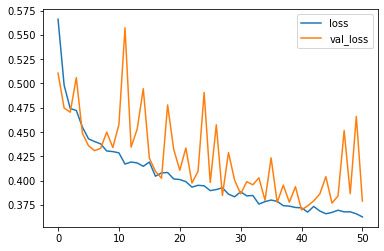

In [158]:
pd.DataFrame(history_8.history).plot()

In [159]:
model_8.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 128)               1152      
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,305
Trainable params: 34,305
Non-trainable params: 0
_________________________________________________________________


### Predictions

Compare the evaluation results with the y_test/predictions with *mean_absolute_error*

Create a dataset from the 0th element in the original dataframe and run a prediction on it

How does it compare to the real price?

In [160]:
prediction_8 = model_8.predict(X_test)

In [161]:
mean_absolute_error(y_test, prediction_8)

0.37885652569447686

In [163]:
model_8.evaluate(X_test, y_test)

194/194 [==============================] - 0s 2ms/step - loss: 0.3789


0.37885645031929016

In [164]:
df['target'].mean()

2.068558169089147

In [165]:
test_data = df.loc[0]

In [166]:
test_data

MedInc          8.325200
HouseAge       41.000000
AveRooms        6.984127
AveBedrms       1.023810
Population    322.000000
AveOccup        2.555556
Latitude       37.880000
Longitude    -122.230000
target          4.526000
Name: 0, dtype: float64

In [168]:
test_data = test_data.drop('target').values.reshape(-1,8)

In [169]:
test_data

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [170]:
test_data = scaler.transform(test_data)

In [171]:
test_data

array([[0.53966842, 0.78431373, 0.04322245, 0.02046866, 0.0088575 ,
        0.00264715, 0.5674814 , 0.21115538]])

In [172]:
model_8.predict(test_data)

array([[4.7937355]], dtype=float32)